In [ ]:

import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Data downloaded from https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017
#using terminal, convert .xtp files to .csv and upload to deepnote 
#pip install xport
#cd to Downloads directory
#python -m xport fild.xtp > file.csv

In [ ]:
#Combine csv's for analysis: demographics, alcohol use, diet behavior nutrition, drug use, depression screener, physical functioning
csv_files = ['/work/ALQ_J.csv','/work/DBQ_J.csv', '/work/DUQ_J.csv', '/work/DPQ_J.csv', '/work/PFQ_J.csv']

#Need a populated dataframe to use merge on SEQN, so start with Demographics csv.
df_merged = pd.read_csv('/work/DEMO_J.csv')
#merge all files together
for file in csv_files:
    df_temp = pd.read_csv(file)
    df_merged = df_merged.merge(df_temp, on = 'SEQN', how = 'outer')
#185 columns

In [ ]:
#Cut the df down to only the colums I am interested in. 
dem_list = ['SEQN','RIAGENDR', 'RIDAGEYR']
alc_list = ['ALQ111','ALQ121', 'ALQ130', 'ALQ142', 'ALQ270', 'ALQ280', 'ALQ290', 'ALQ151','ALQ170']
dep_list = ['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'DPQ100']
phys_list = ['PFQ030','PFQ033','PFQ041','PFQ049', 'PFQ051', 'PFQ057', 'PFQ059', 'PFQ061B', 'PFQ061C', 'PFQ061D', 'PFQ061E', 'PFQ061M', 'PFQ061N', 'PFQ061O']
column_titles = dem_list + alc_list + dep_list + phys_list
data = df_merged[column_titles]
data

,SEQN,RIAGENDR,RIDAGEYR,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,...,PFQ051,PFQ057,PFQ059,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061M,PFQ061N,PFQ061O
0,93703.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,66.0,1.0,7.0,1.0,0.0,NaN,NaN,NaN,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,93706.0,1.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9249,102952.0,2.0,70.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9250,102953.0,1.0,42.0,1.0,6.0,12.0,6.0,0.0,6.0,0.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9251,102954.0,2.0,41.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,2.0,1.0,2.0,2.0,1.0,1.0,1.0
9252,102955.0,2.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data.columns
data_s = data.copy()


In [ ]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9254 entries, 0 to 9253
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9254 non-null   float64
 1   RIAGENDR  9254 non-null   float64
 2   RIDAGEYR  9254 non-null   float64
 3   ALQ111    5130 non-null   float64
 4   ALQ121    4545 non-null   float64
 5   ALQ130    3495 non-null   float64
 6   ALQ142    3495 non-null   float64
 7   ALQ270    1439 non-null   float64
 8   ALQ280    1439 non-null   float64
 9   ALQ290    522 non-null    float64
 10  ALQ151    4544 non-null   float64
 11  ALQ170    3487 non-null   float64
 12  DPQ010    5094 non-null   float64
 13  DPQ020    5093 non-null   float64
 14  DPQ030    5093 non-null   float64
 15  DPQ040    5092 non-null   float64
 16  DPQ050    5092 non-null   float64
 17  DPQ060    5091 non-null   float64
 18  DPQ070    5091 non-null   float64
 19  DPQ080    5091 non-null   float64
 20  DPQ090    5090 non-null   floa

In [ ]:
#Cut the dataframe down to only the age range I am interested in
data_s = data_s[(data_s['RIDAGEYR'] >= 12) & (data_s['RIDAGEYR'] <= 70)]
data_s.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5800 entries, 2 to 9253
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5800 non-null   float64
 1   RIAGENDR  5800 non-null   float64
 2   RIDAGEYR  5800 non-null   float64
 3   ALQ111    4337 non-null   float64
 4   ALQ121    3856 non-null   float64
 5   ALQ130    3104 non-null   float64
 6   ALQ142    3104 non-null   float64
 7   ALQ270    1380 non-null   float64
 8   ALQ280    1380 non-null   float64
 9   ALQ290    507 non-null    float64
 10  ALQ151    3855 non-null   float64
 11  ALQ170    3078 non-null   float64
 12  DPQ010    4325 non-null   float64
 13  DPQ020    4325 non-null   float64
 14  DPQ030    4325 non-null   float64
 15  DPQ040    4324 non-null   float64
 16  DPQ050    4324 non-null   float64
 17  DPQ060    4323 non-null   float64
 18  DPQ070    4323 non-null   float64
 19  DPQ080    4323 non-null   float64
 20  DPQ090    4322 non-null   floa

In [ ]:
#Remove everyone who didnt answer any alcohol questions
df = data_s.dropna(axis = 0, subset=alc_list, how='all')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4461 entries, 2 to 9253
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      4461 non-null   float64
 1   RIAGENDR  4461 non-null   float64
 2   RIDAGEYR  4461 non-null   float64
 3   ALQ111    4337 non-null   float64
 4   ALQ121    3856 non-null   float64
 5   ALQ130    3104 non-null   float64
 6   ALQ142    3104 non-null   float64
 7   ALQ270    1380 non-null   float64
 8   ALQ280    1380 non-null   float64
 9   ALQ290    507 non-null    float64
 10  ALQ151    3855 non-null   float64
 11  ALQ170    3078 non-null   float64
 12  DPQ010    4323 non-null   float64
 13  DPQ020    4323 non-null   float64
 14  DPQ030    4323 non-null   float64
 15  DPQ040    4323 non-null   float64
 16  DPQ050    4323 non-null   float64
 17  DPQ060    4323 non-null   float64
 18  DPQ070    4323 non-null   float64
 19  DPQ080    4323 non-null   float64
 20  DPQ090    4322 non-null   floa

In [ ]:
#Remove all rows where people answered "dont know" or "refused"
#DPQ: 7 and 9
#ALQ: 77, 99, 777, 999
#DUQ: 7, 9, 777, 999, 77, 99
#PFQ: 7 and 9

for i in dep_list:
    df = df[(df[i] != 7) & (df[i] != 9)]
df.info()

for i in alc_list:
    df = df[(df[i] != 77) & (df[i] != 99 )& (df[i] != 777) & (df[i] != 999)]
df.info()

for i in phys_list:
    df = df[(df[i] != 7) & (df[i] != 9)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446 entries, 2 to 9253
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      4446 non-null   float64
 1   RIAGENDR  4446 non-null   float64
 2   RIDAGEYR  4446 non-null   float64
 3   ALQ111    4322 non-null   float64
 4   ALQ121    3845 non-null   float64
 5   ALQ130    3097 non-null   float64
 6   ALQ142    3097 non-null   float64
 7   ALQ270    1376 non-null   float64
 8   ALQ280    1376 non-null   float64
 9   ALQ290    504 non-null    float64
 10  ALQ151    3845 non-null   float64
 11  ALQ170    3072 non-null   float64
 12  DPQ010    4308 non-null   float64
 13  DPQ020    4308 non-null   float64
 14  DPQ030    4308 non-null   float64
 15  DPQ040    4308 non-null   float64
 16  DPQ050    4308 non-null   float64
 17  DPQ060    4308 non-null   float64
 18  DPQ070    4308 non-null   float64
 19  DPQ080    4308 non-null   float64
 20  DPQ090    4307 non-null   floa

In [ ]:
#Drop the PFQ questions with all null values_
low = ['PFQ030', 'PFQ033', 'PFQ041']
df = df.drop(columns=low)

#Now our dataframe has 4393 people/rows.

In [ ]:
#Make new columns that has the sum of the depression and alcohol answers. Use this for analysis.
df['dep_score'] = df.loc[:,dep_list].sum(axis=1)
#df['dep_score'].value_counts()
df.head()


,SEQN,RIAGENDR,RIDAGEYR,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,...,PFQ057,PFQ059,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061M,PFQ061N,PFQ061O,dep_score
2,93705.0,2.0,66.0,1.0,7.0,1.0,0.0,NaN,NaN,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,93706.0,1.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,93708.0,2.0,66.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,2.0,2.0,3.0,1.0,3.0,1.0,1.0,0.0
8,93711.0,1.0,56.0,1.0,5.0,1.0,0.0,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,93712.0,1.0,18.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
for i in alc_list:
    print(df[i].value_counts())
df.info()

1.0    3799
2.0     475
Name: ALQ111, dtype: int64
0.0     744
6.0     545
10.0    448
9.0     414
7.0     315
5.0     304
4.0     291
8.0     270
3.0     242
2.0     128
1.0      98
Name: ALQ121, dtype: int64
1.0     1052
2.0      939
3.0      452
4.0      229
5.0      122
6.0      112
8.0       37
12.0      36
10.0      25
7.0       22
15.0      16
9.0        8
13.0       3
11.0       1
Name: ALQ130, dtype: int64
0.0     1700
10.0     400
9.0      224
6.0      203
7.0      133
4.0       98
5.0       96
8.0       91
3.0       56
1.0       29
2.0       24
Name: ALQ142, dtype: int64
0.0     711
10.0    255
7.0      82
9.0      75
5.0      58
6.0      54
8.0      36
4.0      35
3.0      21
2.0      17
1.0      10
Name: ALQ270, dtype: int64
0.0     861
10.0    185
9.0      70
7.0      54
6.0      42
5.0      38
8.0      37
4.0      27
3.0      17
2.0      15
1.0       8
Name: ALQ280, dtype: int64
0.0     256
10.0     87
5.0      29
9.0      28
6.0      25
7.0      23
8.0      19
4.0      

Now we need to re-scale the alcohol questions so we can do analysis on the answers. Rescale so that the answers range from 1-5. NaN -> 0

For ALQ121, 142, 270, 280, 290: 
NaN    -> 0
0      -> 1 (Never)
9,10   -> 2 (1-6x/year)
6,7,8  -> 3 (2-3x/month - 7-11x/year)
 4,5   -> 4 (1-2x/week)
 1,2,3 -> 5 (3x/week - every day)


 OR we can just move them all, so that 
 NaN = ??? What to do with Nan? 
0 = Never --> 10 = Every day



/tmp/ipykernel_126/147348620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ALQ170'])


<AxesSubplot: xlabel='ALQ170', ylabel='Density'>

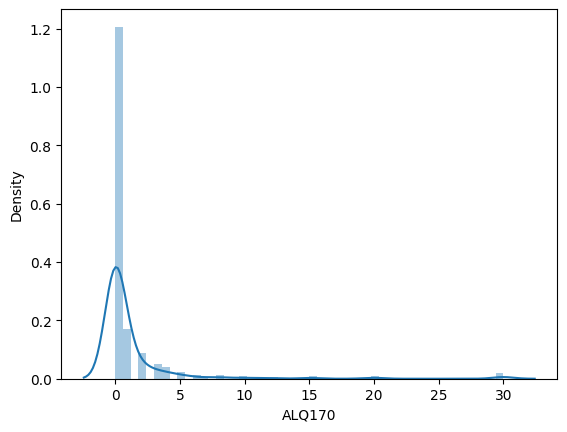

In [ ]:
sns.distplot(df['ALQ170'])

In [ ]:
range_dict = {1:10, 2:9 ,3:8,4:7,5:6, 6:5,7:4, 8:3, 9:2, 10:1}
yn_dict = {2:0}
range_list = ['ALQ121', 'ALQ142', 'ALQ270', 'ALQ280', 'ALQ290']
count_list = ['ALQ130', 'ALQ170']
yn_list = ['ALQ111', 'ALQ151']


for i in range_list:
    print(df[i].replace(range_dict, inplace = True))

for i in yn_list:
    print(df[i].replace(yn_dict, inplace = True))

df.head(n=20)

None
None
None
None
None
None
None


,SEQN,RIAGENDR,RIDAGEYR,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,...,PFQ057,PFQ059,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061M,PFQ061N,PFQ061O,dep_score
2,93705.0,2.0,66.0,1.0,4.0,1.0,0.0,NaN,NaN,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,93706.0,1.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,93708.0,2.0,66.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,2.0,2.0,3.0,1.0,3.0,1.0,1.0,0.0
8,93711.0,1.0,56.0,1.0,6.0,1.0,0.0,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,93712.0,1.0,18.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10,93713.0,1.0,67.0,1.0,5.0,3.0,0.0,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
11,93714.0,2.0,54.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
13,93716.0,1.0,61.0,1.0,4.0,2.0,1.0,0.0,2.0,1.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
14,93717.0,1.0,22.0,1.0,10.0,15.0,10.0,10.0,9.0,8.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
15,93718.0,1.0,45.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


/tmp/ipykernel_126/63799124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ALQ290'])


<AxesSubplot: xlabel='ALQ290', ylabel='Density'>

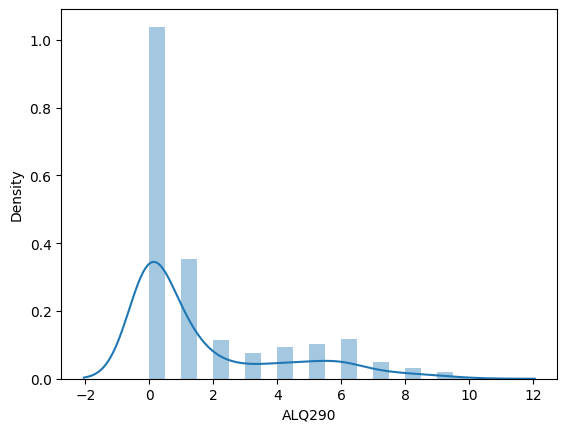

In [ ]:
sns.distplot(df['ALQ290'])

/tmp/ipykernel_126/1999326823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ALQ280'])


<AxesSubplot: xlabel='ALQ280', ylabel='Density'>

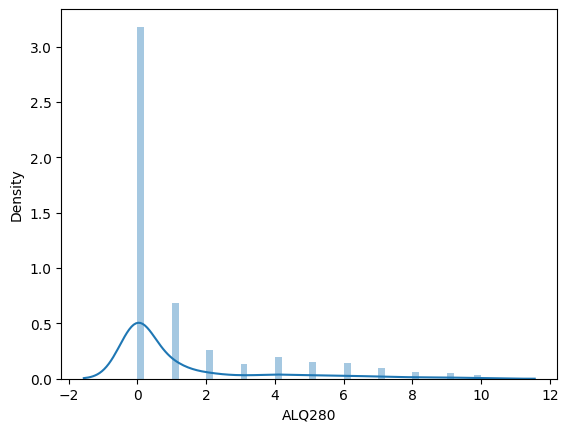

In [ ]:
sns.distplot(df['ALQ280'])

/tmp/ipykernel_126/3230099941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ALQ142'])


<AxesSubplot: xlabel='ALQ142', ylabel='Density'>

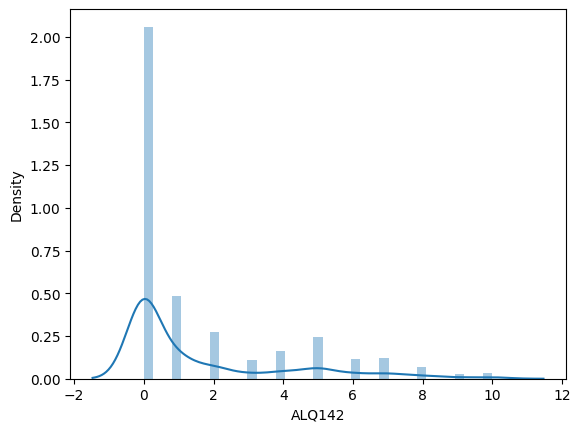

In [ ]:
sns.distplot(df['ALQ142'])

Lets make an alcohol score column. Missing values are counted as zeros. 

In [ ]:
temp = pd.DataFrame()
alc = df[alc_list]
temp['qs'] = alc.isnull().sum(axis = 1)
temp['qs'] = len(alc_list) - temp['qs']
df['alc_answered'] = temp['qs']


In [ ]:
df['alc_score'] = df[alc_list].sum(axis =1)

/tmp/ipykernel_126/1538346611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['alc_score'])


<AxesSubplot: xlabel='alc_score', ylabel='Density'>

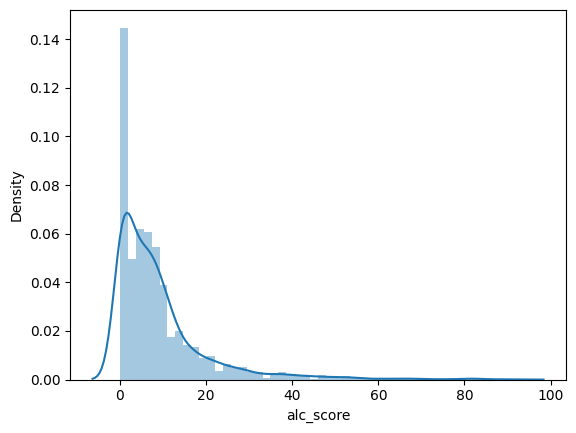

In [ ]:
sns.distplot(df['alc_score'])

In [ ]:
df['alc_score'].describe()

count    4393.000000
mean        9.027544
std        11.325171
min         0.000000
25%         1.000000
50%         6.000000
75%        11.000000
max        92.000000
Name: alc_score, dtype: float64

In [ ]:
df[df['alc_score'] == 92]

,SEQN,RIAGENDR,RIDAGEYR,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,...,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061M,PFQ061N,PFQ061O,dep_score,alc_answered,alc_score
5121,98824.0,1.0,24.0,1.0,9.0,15.0,9.0,9.0,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9,92.0


In this case, the person with the highest alcohol score has a depression score of 0 and no physical limitations.

In [ ]:
df['dep_score'].describe()

count    4393.000000
mean        3.361484
std         4.592104
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        28.000000
Name: dep_score, dtype: float64

In [ ]:
df[df['dep_score'] == 28]


,SEQN,RIAGENDR,RIDAGEYR,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,...,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061M,PFQ061N,PFQ061O,dep_score,alc_answered,alc_score
7012,100715.0,2.0,51.0,1.0,1.0,4.0,1.0,0.0,0.0,NaN,...,NaN,NaN,4.0,4.0,3.0,3.0,3.0,28.0,8,7.0
8119,101822.0,1.0,40.0,1.0,7.0,8.0,7.0,7.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,9,50.0


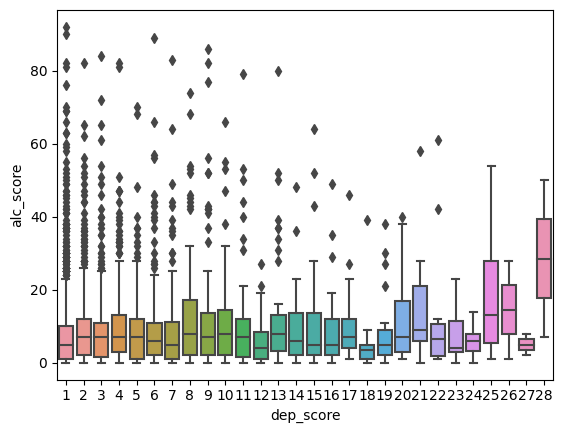

<Figure size 2000x500 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

plt.figure(figsize=(20, 5))
g = sns.boxplot(data = df, x= 'dep_score', y = 'alc_score', ax = ax)
g.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
plt.show()

Student T Test

Multiple Subsets. can do 2 or 1st and last quantiles. 

1st Subset Low depression score
2nd Subset high depression score

Check posted resources about unbalanced data.

Mess around with dropna() because classification and prediction models can't handle missing values. 

If you are able to find correlations/similarities between different variables, you can maybe use these to fill in missing values.



In [ ]:
df['dep_bool'] = np.where(df['dep_score'] > 15, True, False)
df.head(n=20)

,SEQN,RIAGENDR,RIDAGEYR,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,...,PFQ061C,PFQ061D,PFQ061E,PFQ061M,PFQ061N,PFQ061O,dep_score,alc_answered,alc_score,dep_bool
2,93705.0,2.0,66.0,1.0,4.0,1.0,0.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6,11.0,False
3,93706.0,1.0,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,0.0,False
5,93708.0,2.0,66.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,1.0,3.0,1.0,1.0,0.0,1,0.0,False
8,93711.0,1.0,56.0,1.0,6.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6,8.0,False
9,93712.0,1.0,18.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,1.0,False
10,93713.0,1.0,67.0,1.0,5.0,3.0,0.0,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,9.0,6,9.0,False
11,93714.0,2.0,54.0,1.0,2.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6,4.0,False
13,93716.0,1.0,61.0,1.0,4.0,2.0,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,9,12.0,False
14,93717.0,1.0,22.0,1.0,10.0,15.0,10.0,10.0,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,9,64.0,False
15,93718.0,1.0,45.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3,10.0,False


Now we can try to visualize the data and see if any patterns emerge relating to those people who we have classified as depressed

In [ ]:
df_not_depressed = df[df["dep_bool"] == False]
df_not_depressed.info()
df_not_depressed['alc_score'].describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4248 entries, 2 to 9253
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEQN          4248 non-null   float64
 1   RIAGENDR      4248 non-null   float64
 2   RIDAGEYR      4248 non-null   float64
 3   ALQ111        4129 non-null   float64
 4   ALQ121        3660 non-null   float64
 5   ALQ130        2949 non-null   float64
 6   ALQ142        2949 non-null   float64
 7   ALQ270        1305 non-null   float64
 8   ALQ280        1305 non-null   float64
 9   ALQ290        467 non-null    float64
 10  ALQ151        3660 non-null   float64
 11  ALQ170        2930 non-null   float64
 12  DPQ010        4115 non-null   float64
 13  DPQ020        4115 non-null   float64
 14  DPQ030        4115 non-null   float64
 15  DPQ040        4115 non-null   float64
 16  DPQ050        4115 non-null   float64
 17  DPQ060        4115 non-null   float64
 18  DPQ070        4115 non-null 

count    4248.000000
mean        8.974105
std        11.275696
min         0.000000
25%         1.000000
50%         6.000000
75%        11.000000
max        92.000000
Name: alc_score, dtype: float64

In [ ]:
 df_depressed = df[df["dep_bool"] == True]
df_depressed.info()
df_depressed['alc_score'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 57 to 9208
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEQN          145 non-null    float64
 1   RIAGENDR      145 non-null    float64
 2   RIDAGEYR      145 non-null    float64
 3   ALQ111        145 non-null    float64
 4   ALQ121        139 non-null    float64
 5   ALQ130        105 non-null    float64
 6   ALQ142        105 non-null    float64
 7   ALQ270        49 non-null     float64
 8   ALQ280        49 non-null     float64
 9   ALQ290        26 non-null     float64
 10  ALQ151        139 non-null    float64
 11  ALQ170        96 non-null     float64
 12  DPQ010        145 non-null    float64
 13  DPQ020        145 non-null    float64
 14  DPQ030        145 non-null    float64
 15  DPQ040        145 non-null    float64
 16  DPQ050        145 non-null    float64
 17  DPQ060        145 non-null    float64
 18  DPQ070        145 non-null  

count    145.000000
mean      10.593103
std       12.632353
min        0.000000
25%        2.000000
50%        6.000000
75%       12.000000
max       61.000000
Name: alc_score, dtype: float64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7bb7849b-67ee-45eb-a798-2f280f55fefe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>